In [333]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [334]:
data_set = pd.read_csv("https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv")

In [335]:
df = data_set.copy()

In [336]:
df.drop(columns=["Lat","Long","Province/State"],inplace=True)

In [338]:
df.sort_values(["Country/Region"],inplace=True)
df.reset_index(drop=True,inplace=True)
n = len(df.columns)
print(n)  #n is number of columns

90


In [339]:
#in this cell we combine provinces and states data to country data.

i = 0
while i != df["Country/Region"].count()-1:
    if df.iloc[i][0] == df.iloc[i+1][0]:
        for j in range(n-1):
            #pass
            df.iat[i,j+1] = int(df.get_value(i,j+1,takeable=True)) + int(df.get_value(i+1,j+1,takeable=True))
        df.drop(i+1,inplace=True)
        df.reset_index(drop=True,inplace=True)
        i = i - 1
    i = i+1

c:\users\shiva\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [340]:
pd.set_option('display.max_rows', 300)
print(df["Country/Region"].count())
print(df["Country/Region"].nunique())
df.head()

185
185


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,521,555,607,665,714,784,840,906,933,996
1,Albania,0,0,0,0,0,0,0,0,0,...,416,433,446,467,475,494,518,539,548,562
2,Algeria,0,0,0,0,0,0,0,0,0,...,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629
3,Andorra,0,0,0,0,0,0,0,0,0,...,601,601,638,646,659,673,673,696,704,713
4,Angola,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,24,24


In [341]:
df.set_index("Country/Region",inplace=True)

In [343]:
df = df.T
df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
4/15/20,784,494,2160,673,19,23,2443,1111,6440,14336,...,99483,492,1302,197,267,374,6,1,48,23
4/16/20,840,518,2268,673,19,23,2571,1159,6462,14476,...,104145,502,1349,204,268,374,6,1,48,23
4/17/20,906,539,2418,696,19,23,2669,1201,6522,14595,...,109769,502,1405,204,268,402,6,1,52,24
4/18/20,933,548,2534,704,24,23,2758,1248,6547,14671,...,115314,508,1490,227,268,418,6,1,57,25
4/19/20,996,562,2629,713,24,23,2839,1291,6547,14749,...,121172,517,1565,256,268,437,6,1,61,25


In [345]:
#df.columns

<Figure size 432x288 with 0 Axes>

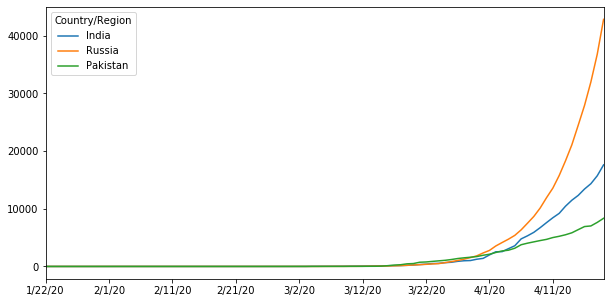

In [346]:
plt.figure(1)
df.plot(y=["India","Russia","Pakistan"],figsize=(10,5))

In [347]:
from sklearn.linear_model import LinearRegression

In [348]:
LinearObj = LinearRegression()

In [349]:
y = df["India"].values.reshape(-1,1)

In [350]:
x = np.array(range(0,n-1))

In [351]:
y = y.flatten()

In [352]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
print(x.shape)
print(y.shape)

(89, 1)
(89, 1)


In [353]:
LinearObj.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [354]:
y_pred = LinearObj.predict(x)

In [355]:
test = np.array([85,86,87,88,89]).reshape(-1,1)
print(LinearObj.predict(test))

[[6196.90648621]
 [6302.15413687]
 [6407.40178754]
 [6512.6494382 ]
 [6617.89708887]]


<font size='5' color='red'>We have implemented linear regression but didn't get satisfactory results...therefore below is implementation of polynomial regression<font>

In [356]:
from sklearn.preprocessing import PolynomialFeatures

In [357]:
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x)

In [358]:
obj = LinearRegression()
obj.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Number of Cases')

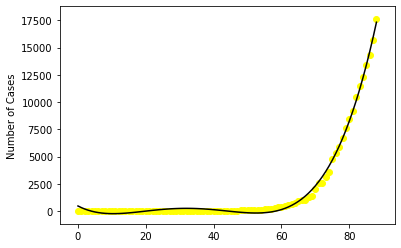

In [362]:
y_poly_pred = obj.predict(x_poly)
plt.plot(x,y_poly_pred,color="black")
plt.scatter(x,y,color="yellow")
plt.ylabel("Number of Cases")

In [365]:
test = np.array(range(86,91)).reshape(-1,1)
obj.predict(test)

ValueError: shapes (5,1) and (5,1) not aligned: 1 (dim 1) != 5 (dim 0)